### Importing stuff and loading dataframe

In [108]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pprint
import seaborn as sns
import math

plt.style.use('ggplot')
df = pd.read_csv('data\\train.csv')

df.shape

(891, 12)

### Describing the dataframe

In [109]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Shellard, Mr. Frederick William",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [110]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Visualising the dataframe

### Survivors based on sex

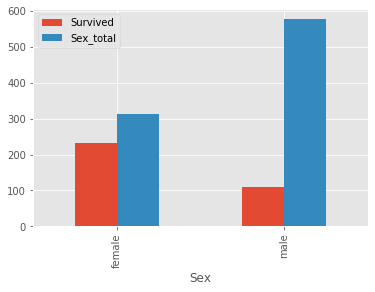

In [111]:
df_sex_survive = df[['Sex','Survived']].groupby('Sex').apply(sum)
df_sex_survive.join(df['Sex'].value_counts(),rsuffix='_total').plot(y=['Survived','Sex_total'],kind='bar')

### Survivors by age

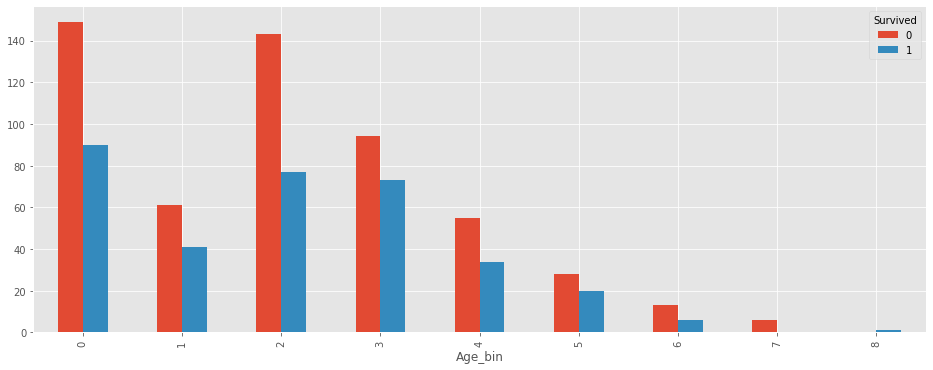

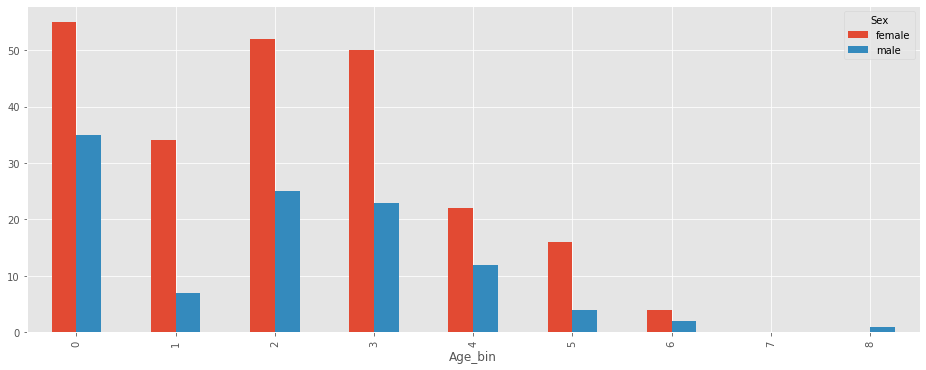

In [112]:
df2 = df.copy()
df2.fillna(0,inplace=True)
df2['Age_bin'] = (df2['Age']/10).apply(math.floor)
df2['Count'] = 1
df2[['Age_bin','Survived','Count']].pivot_table(values='Count',index='Age_bin',columns='Survived',aggfunc='sum').plot(kind='bar',figsize=(16,6))
df2[['Age_bin','Sex','Survived']].pivot_table(values='Survived',index='Age_bin',columns='Sex',aggfunc='sum').plot(kind='bar',figsize=(16,6))


### Survivors by ticket class

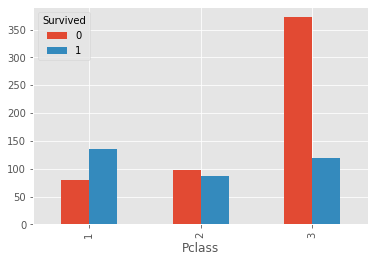

In [113]:
df[['Pclass','Survived','PassengerId']].pivot_table(values='PassengerId',index='Pclass',columns='Survived',aggfunc='count').plot(kind='bar')

### Sibling+spouse vis

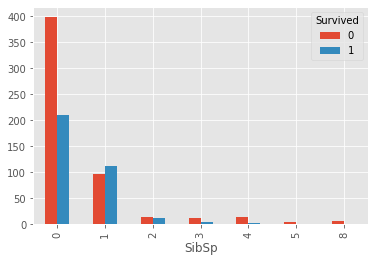

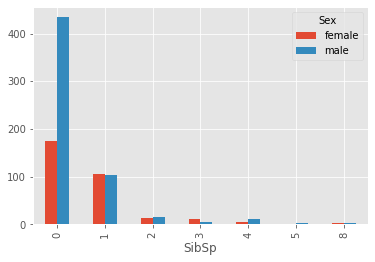

In [114]:
df[['SibSp','Survived','PassengerId']].pivot_table(values='PassengerId',index='SibSp',columns='Survived',aggfunc='count').plot(kind='bar')
df[['SibSp','Sex','Survived']].pivot_table(values='Survived',index='SibSp',columns='Sex',aggfunc='count').plot(kind='bar')

### Parent + children

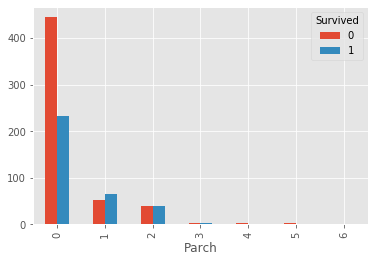

In [115]:
df[['Parch','Survived','PassengerId']].pivot_table(values='PassengerId',index='Parch',columns='Survived',aggfunc='count').plot(kind='bar')

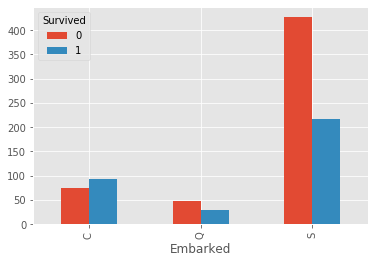

In [116]:
df[['Embarked','Name','Survived']].pivot_table(values='Name',index='Embarked',columns='Survived',aggfunc='count').plot(kind='bar')

## Feature engineering

In [117]:
df['Family_size'] = df['Parch'] + df['SibSp']
df['Fare_per_person'] = df['Fare']/(df['Family_size']+1)

df['Count'] = 1  # For visualising purposes

In [118]:
def extract_deck(ticket:str):
    if type(ticket) is not str:
        return None
    out = []
    for char in ticket:
        if char.isalpha():
            out.append(char)
    try:
        return out[0]
    except IndexError:
        return None

df['Deck'] = df['Ticket'].apply(extract_deck)
df['Deck'].value_counts()

S    65
P    65
C    47
A    29
W    13
F     7
L     4
Name: Deck, dtype: int64

In [119]:
def extract_title(name:str):
    comma = name.find(',')
    dot = name.find('.',comma)
    return name[comma+2:dot]

df['Title'] = df['Name'].apply(extract_title)
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Capt              1
Mme               1
Ms                1
Sir               1
the Countess      1
Jonkheer          1
Don               1
Lady              1
Name: Title, dtype: int64

Survived,0,1,Pct
Deck,,,
P,23,42,0.646154
F,3,4,0.571429
C,31,16,0.340426
S,44,21,0.323077
L,3,1,0.250000
W,11,2,0.153846
A,27,2,0.068966


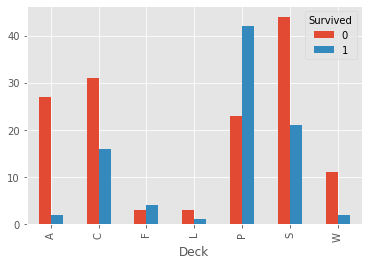

In [120]:
pivot_deck = df[['Deck','Survived','Count']].pivot_table(values='Count',index='Deck',columns='Survived',aggfunc='sum')
pivot_deck.plot(kind='bar')
pivot_deck['Pct'] = pivot_deck[1]/(pivot_deck[0]+pivot_deck[1])
pivot_deck.sort_values('Pct',ascending=False)

In [121]:
pivot_title = df[['Title','Survived','Count']].pivot_table(values='Count',index='Title',columns='Survived',aggfunc='sum')
pivot_title.fillna(0,inplace=True)
pivot_title['Pct'] = pivot_title[1]/(pivot_title[0]+pivot_title[1])
pivot_title.sort_values('Pct',ascending=False)

Survived,0,1,Pct
Title,,,
the Countess,0.0,1.0,1.000000
Mlle,0.0,2.0,1.000000
Sir,0.0,1.0,1.000000
Ms,0.0,1.0,1.000000
Lady,0.0,1.0,1.000000
Mme,0.0,1.0,1.000000
Mrs,26.0,99.0,0.792000
Miss,55.0,127.0,0.697802
Master,17.0,23.0,0.575000


In [122]:
def process_dataframe(dataframe):
    dataframe['Family_size'] = dataframe['Parch'] + dataframe['SibSp']
    dataframe['Fare_per_person'] = dataframe['Fare']/(dataframe['Family_size']+1)
    dataframe['Title'] = dataframe['Name'].apply(extract_title)
    dataframe['Deck'] = dataframe['Ticket'].apply(extract_deck)

In [123]:
def create_features(dataframe):
    dataframe['Sex'].replace(to_replace=['male','female'],value=[0,1],inplace=True)
    dataframe['Embarked'].replace(to_replace=['C','Q','S'],value=[0,1,2],inplace=True)
    dataframe['Deck'].replace(to_replace=['P','F','C','S','L','W','A'],value=[0,1,2,3,4,5,6],inplace=True)
    dataframe['Title'].replace(to_replace=['Mrs','Miss','Ms','Master','Mr','the Countess','Mlle','Sir','Lady','Mme','Col','Major','Dr','Jonkheer','Rev','Don','Capt'],value=[0,1,1,2,3,0,0,0,0,0,4,4,4,5,5,5,5],inplace=True)


In [124]:
df_train = pd.read_csv('data\\train.csv')

process_dataframe(df_train)
create_features(df_train)
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Fare_per_person,Title,Deck
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,891.000000,891.000000,891.000000,230.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.535433,0.904602,19.916375,2.135802,2.395652
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.792088,1.613459,35.841257,1.223629,1.974726
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000,0.000000,7.250000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,2.000000,0.000000,8.300000,3.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000,1.000000,23.666667,3.000000,3.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,10.000000,512.329200,5.000000,6.000000


In [125]:
y = df_train['Survived'].values
X = df_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family_size','Fare_per_person','Deck','Title']]
X.fillna(-1,inplace=True)

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

Feats = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Feats, y, test_size=0.25, random_state=42)

In [127]:
clf = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=10,criterion='entropy')
clf.fit(X_train,y_train)
yhat = clf.predict(X_test)
accuracy_score(y_test,yhat)

0.8430493273542601

In [128]:
decisiontree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=10)
decisiontree.fit(Feats,y)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10)

### Predicting on test set using above model

In [129]:
df_test = pd.read_csv('data\\test.csv')

process_dataframe(df_test)
create_features(df_test)
df_test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Fare_per_person,Deck
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,417.000000,122.000000
mean,1100.500000,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188,1.401914,0.839713,21.804161,2.270492
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,0.854496,1.519072,35.639766,1.880904
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000,0.000000,7.629200,0.000000
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,2.000000,0.000000,8.662500,2.000000
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,2.000000,1.000000,26.000000,3.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000,10.000000,262.375000,6.000000


In [130]:
X_test = df_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family_size','Fare_per_person','Deck','Title']]
X_test.fillna(-1,inplace=True)
X_test.Title.replace('Dona',5,inplace=True)
Feats_test = StandardScaler().fit_transform(X_test)

In [131]:
yhat_test = decisiontree.predict(Feats_test)
df_out = df_test[['PassengerId']]
df_out['Survived'] = yhat_test
df_out.to_csv('upload.csv',index=False)

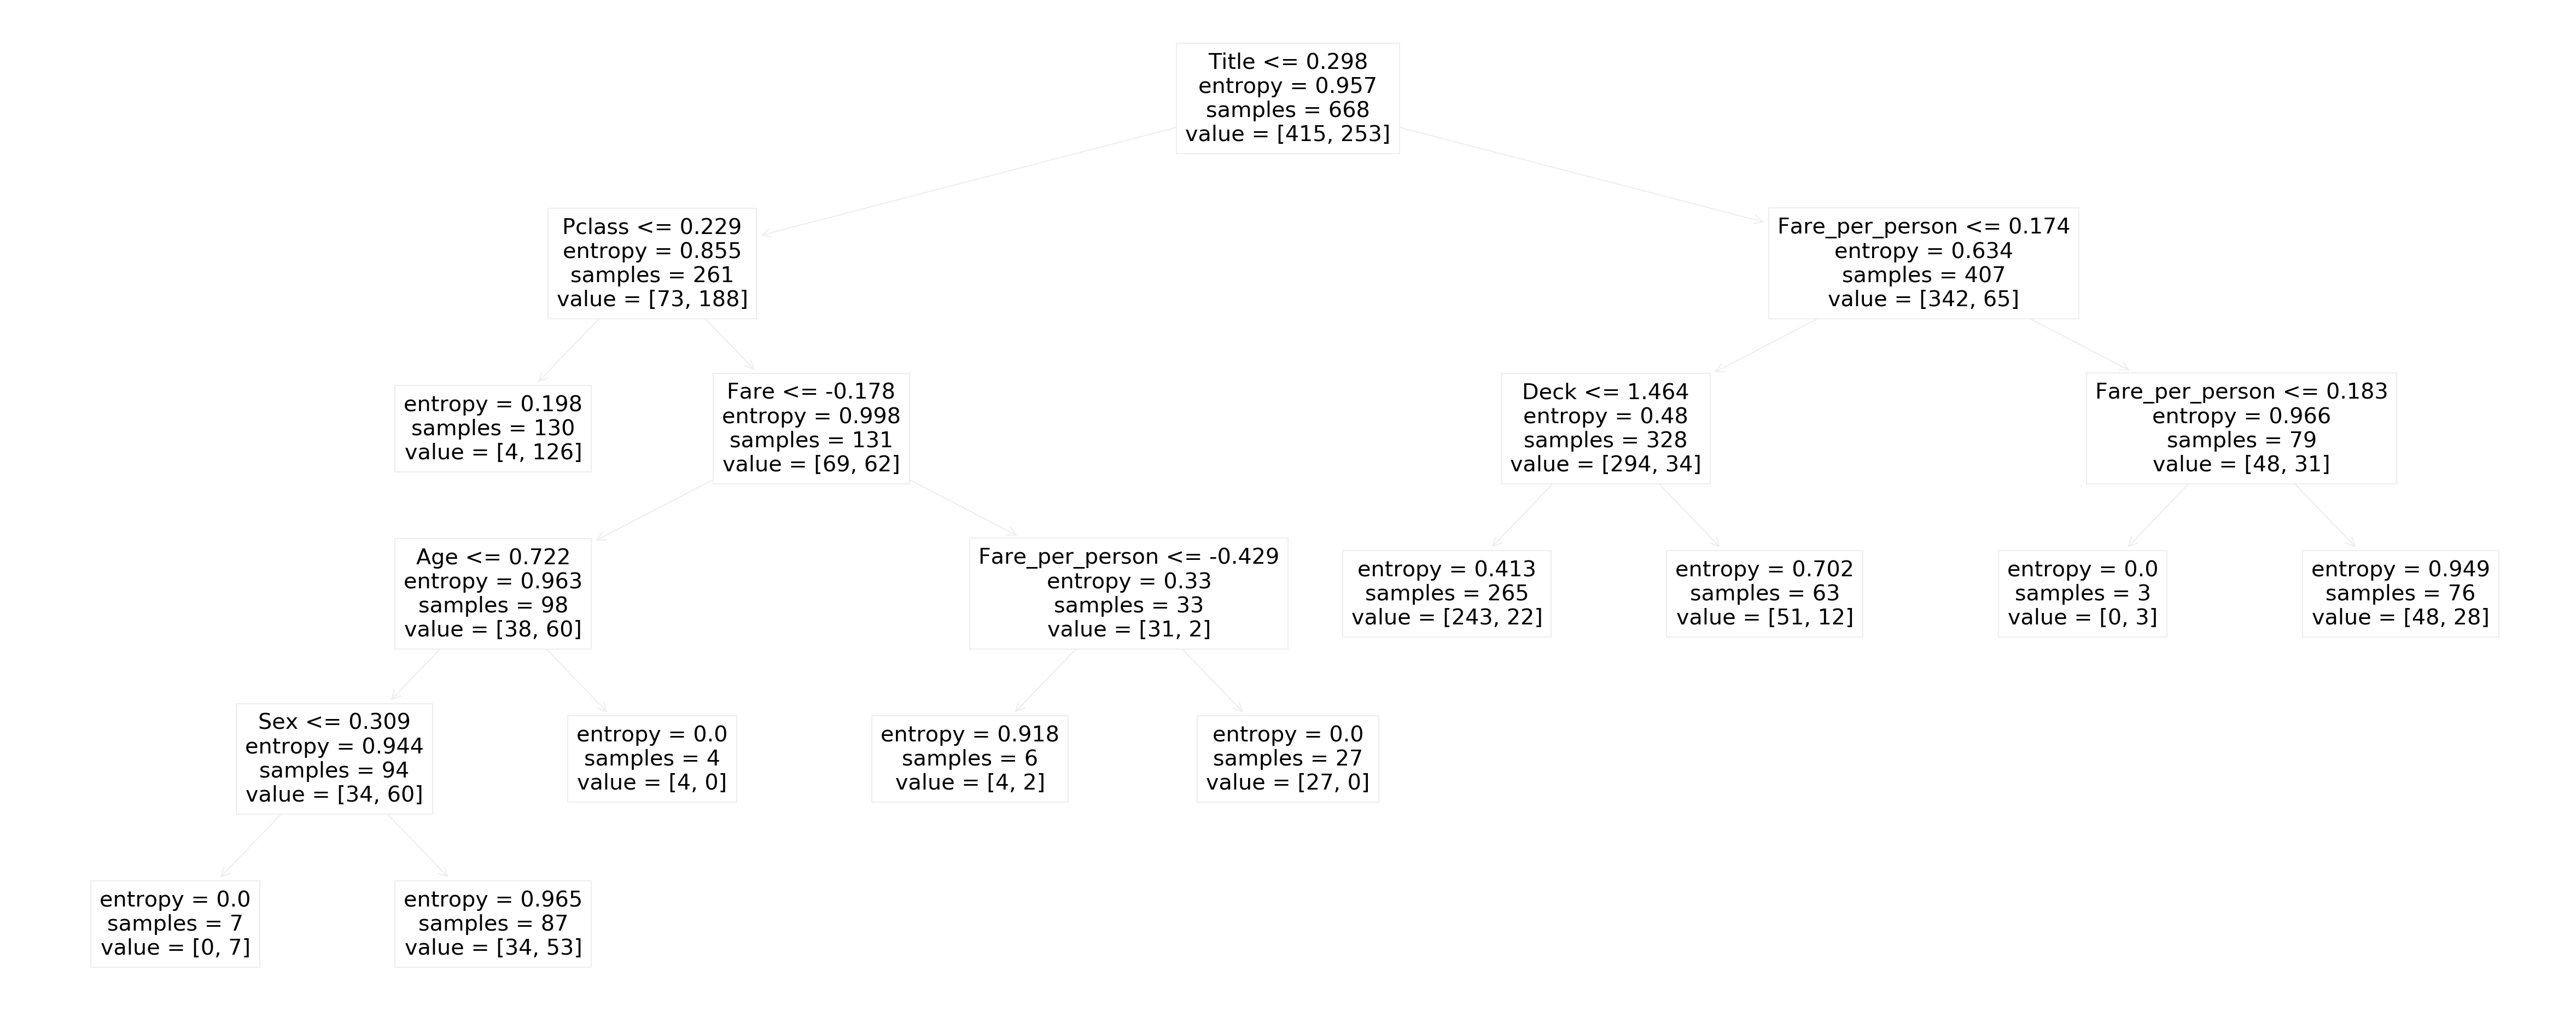

In [137]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,8), dpi=300)
tree.plot_tree(clf,feature_names=X.columns)
fig.savefig('tree.png')